In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/anscombe.csv")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [5]:
df.sample(3,random_state=42)

,dataset,x,y
37,IV,8.0,8.47
24,III,13.0,12.74
25,III,9.0,7.11


In [6]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [7]:
df.describe(include="object")

,dataset
count,44
unique,4
top,I
freq,11


# dataset

In [9]:
df_1=df[df["dataset"]=="I"]
df_2=df[df["dataset"]=="II"]
df_3=df[df["dataset"]=="III"]
df_4=df[df["dataset"]=="IV"]

In [12]:
df_1.describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [13]:
df_1.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


# Series의 빈도수

In [15]:
type(df["dataset"])

pandas.core.series.Series

In [18]:
df["dataset"].value_counts(normalize=True)*100

I      25.0
IV     25.0
II     25.0
III    25.0
Name: dataset, dtype: float64

# Groupby

In [26]:
desc=df.groupby("dataset").describe()
desc

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [24]:
desc["x"].T

dataset,I,II,III,IV
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625
min,4.000000,4.000000,4.000000,8.000000
25%,6.500000,6.500000,6.500000,8.000000
50%,9.000000,9.000000,9.000000,8.000000
75%,11.500000,11.500000,11.500000,8.000000
max,14.000000,14.000000,14.000000,19.000000


In [27]:
desc["y"]

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
I,11.0,7.500909,2.031568,4.26,6.315,7.58,8.57,10.84
II,11.0,7.500909,2.031657,3.10,6.695,8.14,8.95,9.26
III,11.0,7.500000,2.030424,5.39,6.250,7.11,7.98,12.74
IV,11.0,7.500909,2.030579,5.25,6.170,7.04,8.19,12.50


In [30]:
corr=df.groupby("dataset").corr()
corr

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [31]:
corr.loc["I"]

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [32]:
corr.loc["II"]

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [37]:
df.groupby("dataset")["y"].mean()

dataset
I      7.500909
II     7.500909
III    7.500000
IV     7.500909
Name: y, dtype: float64

In [38]:
df.groupby("dataset")["y"].std()

dataset
I      2.031568
II     2.031657
III    2.030424
IV     2.030579
Name: y, dtype: float64

In [39]:
df.groupby("dataset")["y"].agg(["mean","std"])

,mean,std
dataset,,
I,7.500909,2.031568
II,7.500909,2.031657
III,7.500000,2.030424
IV,7.500909,2.030579


In [41]:
df.groupby("dataset").agg({"x":"mean","y":"std"})

,x,y
dataset,,
I,9.0,2.031568
II,9.0,2.031657
III,9.0,2.030424
IV,9.0,2.030579


In [42]:
df.groupby("dataset").agg({"x":"mean","y":["mean","std"]})

x         y          
        mean      mean       std
dataset                         
I        9.0  7.500909  2.031568
II       9.0  7.500909  2.031657
III      9.0  7.500000  2.030424
IV       9.0  7.500909  2.030579

# countplot 그래프

<AxesSubplot:xlabel='dataset', ylabel='count'>

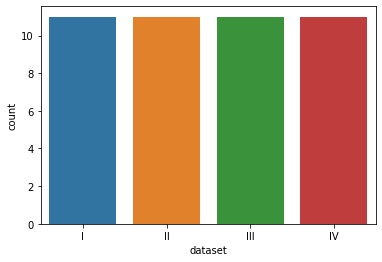

In [43]:
sns.countplot(data=df,x="dataset")

<AxesSubplot:xlabel='count', ylabel='dataset'>

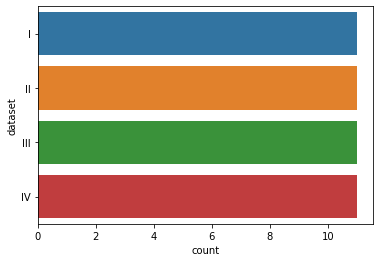

In [44]:
sns.countplot(data=df,y="dataset")

In [45]:
df["dataset"].value_counts()

I      11
IV     11
II     11
III    11
Name: dataset, dtype: int64

# barplot 그래프

<AxesSubplot:xlabel='dataset', ylabel='y'>

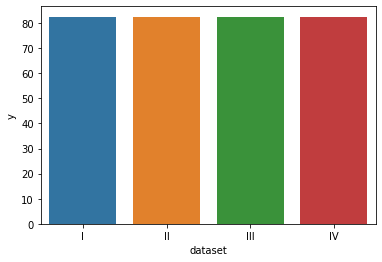

In [54]:
sns.barplot(data=df,x="dataset",y="y",ci=None,estimator=np.sum)

<AxesSubplot:xlabel='dataset', ylabel='y'>

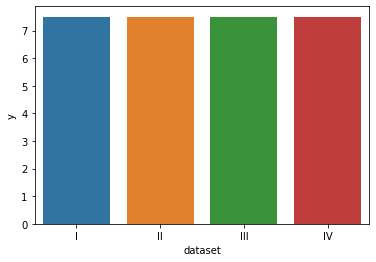

In [52]:
sns.barplot(data=df,x="dataset",y="y", ci=None,estimator=np.mean) #ci는 신뢰수준

In [56]:
df.groupby("dataset")["y"].mean()

dataset
I      7.500909
II     7.500909
III    7.500000
IV     7.500909
Name: y, dtype: float64

<AxesSubplot:xlabel='dataset', ylabel='y'>

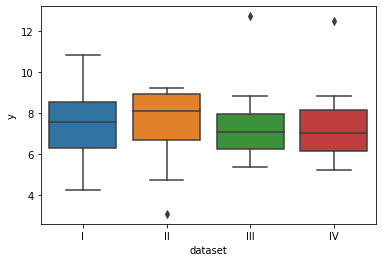

In [57]:
sns.boxplot(data=df,x="dataset",y="y")

<AxesSubplot:xlabel='dataset', ylabel='y'>

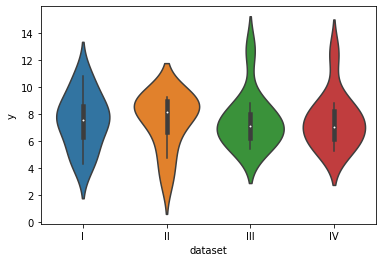

In [58]:
sns.violinplot(data=df,x="dataset",y="y")

# scatterplot 그래프

<AxesSubplot:xlabel='x', ylabel='y'>

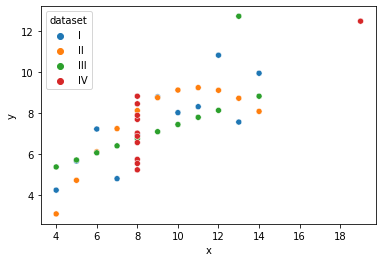

In [61]:
sns.scatterplot(data=df,x="x",y="y",hue="dataset")

# regplot 그래프

<AxesSubplot:xlabel='x', ylabel='y'>

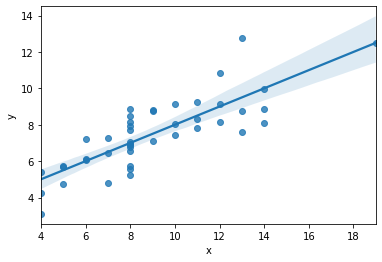

In [63]:
sns.regplot(data=df,x="x",y="y")

# lmplot 그래프

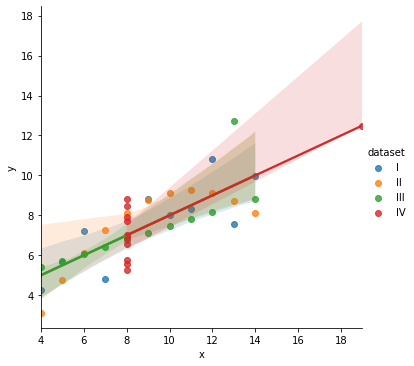

In [67]:
sns.lmplot(data=df,x="x",y="y",hue="dataset")

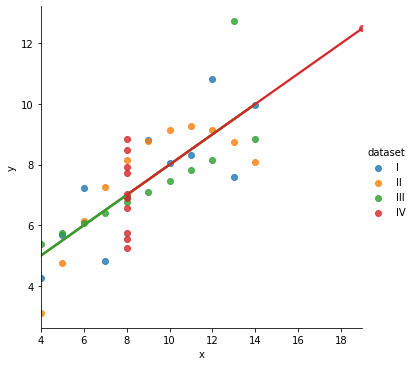

In [68]:
sns.lmplot(data=df,x="x",y="y",hue="dataset",ci=None)

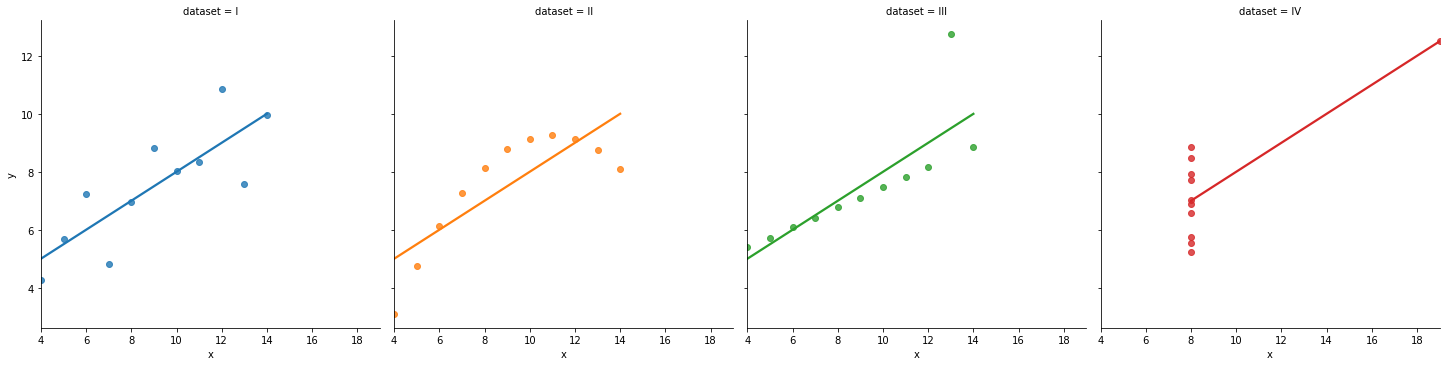

In [69]:
sns.lmplot(data=df,x="x",y="y",hue="dataset",ci=None,col="dataset")

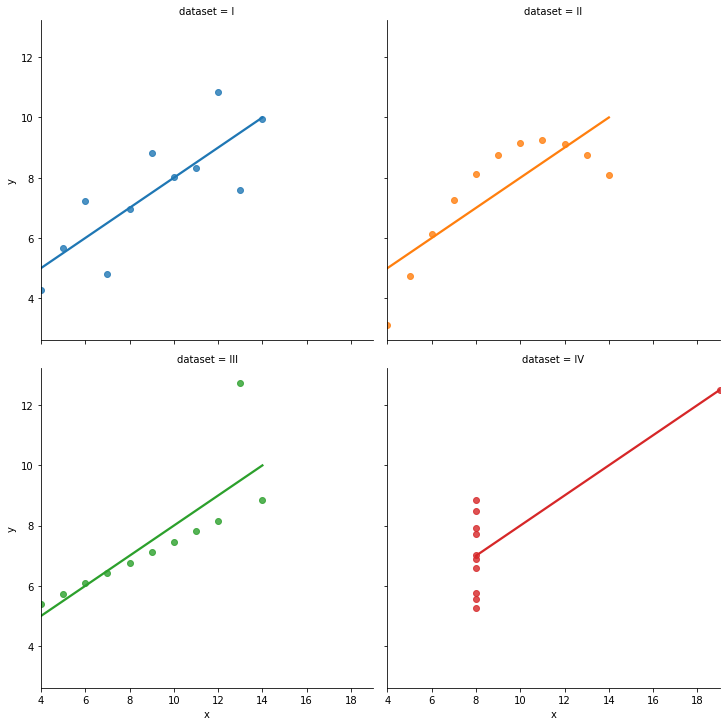

In [70]:
sns.lmplot(data=df,x="x",y="y",hue="dataset",ci=None,col="dataset",col_wrap=2)

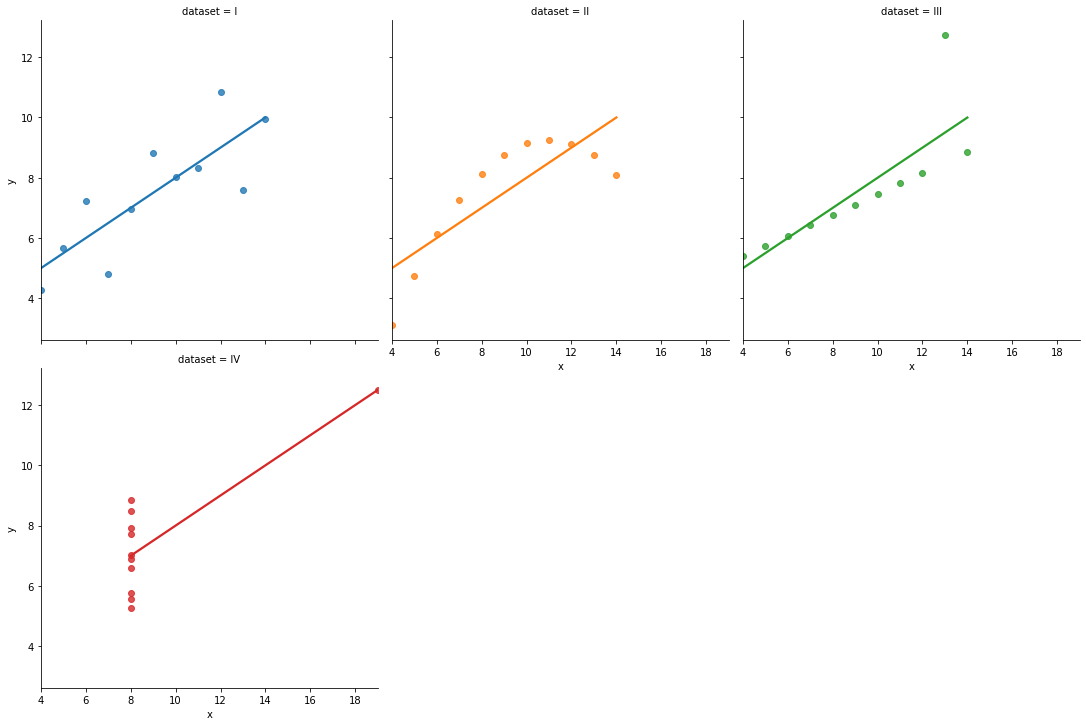

In [71]:
sns.lmplot(data=df,x="x",y="y",hue="dataset",ci=None,col="dataset",col_wrap=3)